In [119]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn import metrics

In [2]:
#####Data Load####################
airlines = pd.read_csv("airline.csv")  

In [21]:
#######Removing Outliers###################
###Dropping the below variables as it's not useful to predict the model

airlines = airlines.drop('City1', axis=1)
airlines= airlines.drop(['market share1','Average fare','Low price airline','market share2'], axis=1)



,Average Fare,Distance,Average weekly passengers,price
0,114.47,528,424.56,111.03
1,122.47,860,276.84,118.94
2,214.42,852,215.76,167.12
3,69.40,288,606.84,68.86
4,158.13,723,313.04,145.42
5,135.17,1204,199.02,127.69
6,152.85,2237,237.17,148.59
7,190.73,2467,191.95,174.00
8,129.35,1073,550.54,127.69
9,134.17,1130,202.93,124.78


In [22]:
airlines.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [23]:
##Check the NUll or NAN values or missing values

airlines[airlines.isnull().any(axis=1)]

,Average Fare,Distance,Average weekly passengers,price


In [25]:
airlines.shape

(1000, 4)

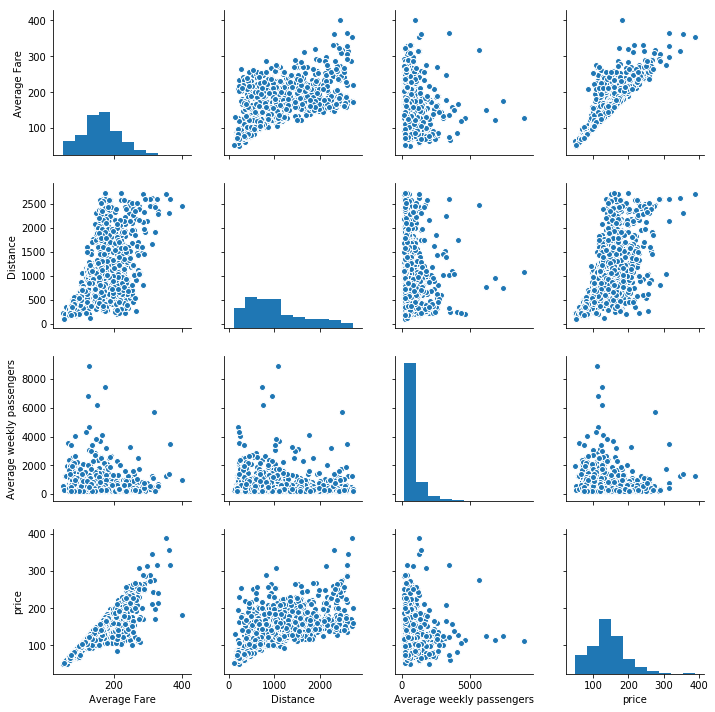

In [26]:
sns.pairplot(airlines) 

In [33]:
print('Avarage Fare & Price is highly related')

##Correlation between the variables
airlines.corr()

Avarage Fare & Price is highly related


,Average Fare,Distance,Average weekly passengers,price
Average Fare,1.000000,0.587169,-0.126175,0.866410
Distance,0.587169,1.000000,-0.090131,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.142314
price,0.866410,0.583239,-0.142314,1.000000


In [28]:
from sklearn.model_selection import train_test_split

##Function to calculate R Square & Adj R Square

In [121]:
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 1)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedSales = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedSales, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

In [122]:
x=airlines[['price']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 7)
##model = LinearRegression()
##model.fit(X_train, y_train)



,trainData,testData
dataSize,700.0000,300.0000
rmse,28.2355,26.1803
rmsePct,17.2187,16.1647
r2,0.7440,0.7666
adjR2,0.7437,0.7658


In [125]:
x=airlines[['Distance']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

,trainData,testData
dataSize,700.0000,300.0000
rmse,44.8630,44.6398
rmsePct,27.3585,27.5622
r2,0.3538,0.3215
adjR2,0.3529,0.3192


In [126]:
x=airlines[['Average weekly passengers']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

,trainData,testData
dataSize,700.0000,300.0000
rmse,55.2346,54.1490
rmsePct,33.6834,33.4335
r2,0.0205,0.0016
adjR2,0.0191,-0.0017


In [128]:
###Multiple Linear Regression

In [129]:
x=airlines[['price','Distance']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

,trainData,testData
dataSize,700.0000,300.0000
rmse,27.5219,26.0018
rmsePct,16.7835,16.0544
r2,0.7568,0.7698
adjR2,0.7561,0.7682


In [132]:
x=airlines[['price','Distance','Average weekly passengers']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

,trainData,testData
dataSize,700.0000,300.0000
rmse,27.5204,26.0066
rmsePct,16.7826,16.0574
r2,0.7568,0.7697
adjR2,0.7558,0.7674


In [133]:
x=airlines[['Distance','Average weekly passengers']]
y=airlines[['Average Fare']]
linRegcheckModelPerformance(x,y)

,trainData,testData
dataSize,700.0000,300.0000
rmse,44.6203,44.6038
rmsePct,27.2105,27.5400
r2,0.3608,0.3226
adjR2,0.3590,0.3180


In [5]:
print('There\'s strong relationshp between Price,Distance(Independent variable) and Average Fare(dependent variable).. This has been identified using Multiple Linear Regression')

print('Every increase in P')

There's strong relationshp between Price,Distance\(Independent variable\) and Average Fare(dependent variable).. This has been identified using Multiple Linear Regression
